## HW2 | KNN Graph Instruction

#### 1. Fill in all code (under # put your code here)

#### 2. Must use Pandas or Numpy if there is an instruction 

#### 3. Generate the plot that is exactly the same as the table right after each code block

#### 4. Answer the question at the end of this jupyter notebook


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

## Swiss Banknote Dataset

Six variables measured on 100 genuine and 100 counterfeit old Swiss 1000-franc
bank notes. The data stem from Flury and Riedwyl (1988). The columns correspond
to the following one label and six variables:

0. Conterfeit - 0: genuine bank notes、1: genuine bank notes (Labels)


1. Length - Length of the bank note


2. Left - Height of the bank note, measured on the left


3. Right - Height of the bank note, measured on the right


4. Bottom - Distance of inner frame to the lower border


5. Top - Distance of inner frame to the upper border


6. Diagonal - Length of the diagonal



More details: [Kaggle | Swiss banknote conterfeit detection](https://www.kaggle.com/chrizzles/swiss-banknote-conterfeit-detection)

In [40]:
# Use [Pandas] to import data | banknotes.csv

bank = pd.read_csv('banknotes.csv')
label = bank.conterfeit

bank.head()

,conterfeit,Length,Left,Right,Bottom,Top,Diagonal
0,0,214.8,131.0,131.1,9.0,9.7,141.0
1,0,214.6,129.7,129.7,8.1,9.5,141.7
2,0,214.8,129.7,129.7,8.7,9.6,142.2
3,0,214.8,129.7,129.6,7.5,10.4,142.0
4,0,215.0,129.6,129.7,10.4,7.7,141.8


In [41]:
# Use [Numpy function] to stack the following columns
# The 5-th column "Bottom" as X, the 6-th column "Top" as Y

# Extract the columns 
bottom = bank['Bottom'].to_numpy()
top = bank['Top'].to_numpy()

# Stack the columns using np.column_stack()
data_xy = np.column_stack((bottom, top))

print(data_xy.shape)
data_xy

(200, 2)


array([[ 9. ,  9.7],
       [ 8.1,  9.5],
       [ 8.7,  9.6],
       [ 7.5, 10.4],
       [10.4,  7.7],
       [ 9. , 10.1],
       [ 7.9,  9.6],
       [ 7.2, 10.7],
       [ 8.2, 11. ],
       [ 9.2, 10. ],
       [ 7.9, 11.7],
       [ 7.7, 10.5],
       [ 7.9, 10.8],
       [ 7.7, 10.9],
       [ 7.7, 10.8],
       [ 9.3,  8.5],
       [ 8.2,  9.8],
       [ 9. ,  9. ],
       [ 7.4, 11.5],
       [ 8.6, 10. ],
       [ 8.4, 10. ],
       [ 8.1, 10.3],
       [ 8.4, 10.8],
       [ 8.7, 10. ],
       [ 7.4, 10.8],
       [ 8. , 11. ],
       [ 8.9,  9.8],
       [ 9.8,  9.5],
       [ 7.4, 10.5],
       [ 8.3,  9. ],
       [ 7.9, 10.7],
       [ 8.6,  9.1],
       [ 7.7, 10.5],
       [ 8.4, 10.3],
       [ 8.9, 10.6],
       [ 9.4,  9.7],
       [ 8.4,  9.7],
       [ 7.9, 10. ],
       [ 8.5,  9.3],
       [ 8.1,  9.7],
       [ 8.9,  9.4],
       [ 8.8,  9.9],
       [ 9.3,  9. ],
       [ 9. ,  9.8],
       [ 8.2, 10.2],
       [ 8.3, 10.2],
       [ 8.3, 10.2],
       [ 7.3,

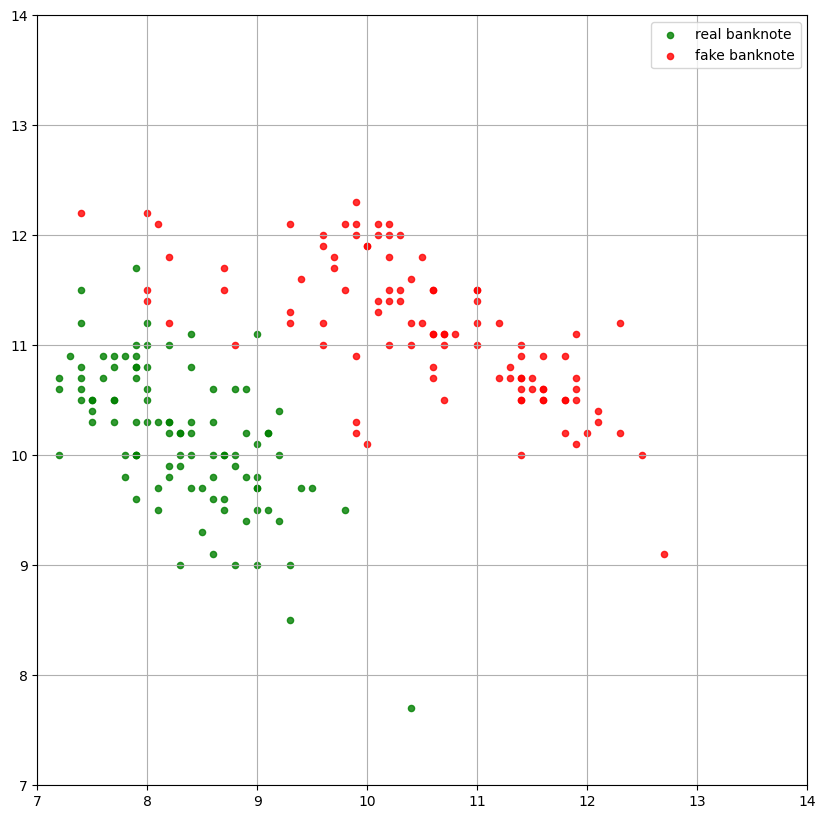

In [42]:
df = bank.copy()

# Use [Numpy function] to find where label = 0 / label = 1
#np.where(condition), returns a tuple of arrays (even if there’s only one dimension). 
#The first element in the tuple corresponds to the indices along axis 0.
index_0 = np.where(df['conterfeit'] == 0)[0] 
index_1 = np.where(df['conterfeit'] == 1)[0]


# Use data_xy to plot the scatter plot 
# Label = 0 → color = green | Label = 1 → color = red
# Fill X and Y in the plt.scatter 
# Remember to put on grid and legend and equal axis
X = df['Bottom'].to_numpy()
Y = df['Top'].to_numpy()

# plot figure
plt.figure(figsize=(10, 10))
plt.scatter(X[index_0], Y[index_0], color='green', label='real banknote', s=20, alpha=0.8)
plt.scatter(X[index_1], Y[index_1], color='red', label='fake banknote', s=20, alpha=0.8)
plt.xlim(7, 14)  
plt.ylim(7, 14)  

# grid configuration
plt.grid(True)
plt.legend()
#ensures that the aspect ratio of the plot is 1:1, 
#meaning the units on both the x-axis and y-axis will be the same length visually. 
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [43]:
# Use [Numpy function] to calculate the squared distance matrix between each points
# Put your code here

points = df[['Bottom', 'Top']].to_numpy()
dist_sq = np.sum((points[:, np.newaxis] - points[np.newaxis, :]) ** 2, axis=-1)

In [44]:
dist_sq

array([[ 0.  ,  0.85,  0.1 , ...,  4.52,  7.09,  4.68],
       [ 0.85,  0.  ,  0.37, ...,  8.81, 12.5 ,  8.41],
       [ 0.1 ,  0.37,  0.  , ...,  5.86,  8.81,  5.86],
       ...,
       [ 4.52,  8.81,  5.86, ...,  0.  ,  0.37,  0.32],
       [ 7.09, 12.5 ,  8.81, ...,  0.37,  0.  ,  1.09],
       [ 4.68,  8.41,  5.86, ...,  0.32,  1.09,  0.  ]])

In [45]:
def nearest_partition(dist_sq, K):
    # Find the indices of the K smallest distances for each point
    # We use np.argsort to get the indices that would sort the array
    nearest_indices = np.argsort(dist_sq, axis=1)[:, 1:K+1]  # Exclude the first column (distance to itself)
    return nearest_indices


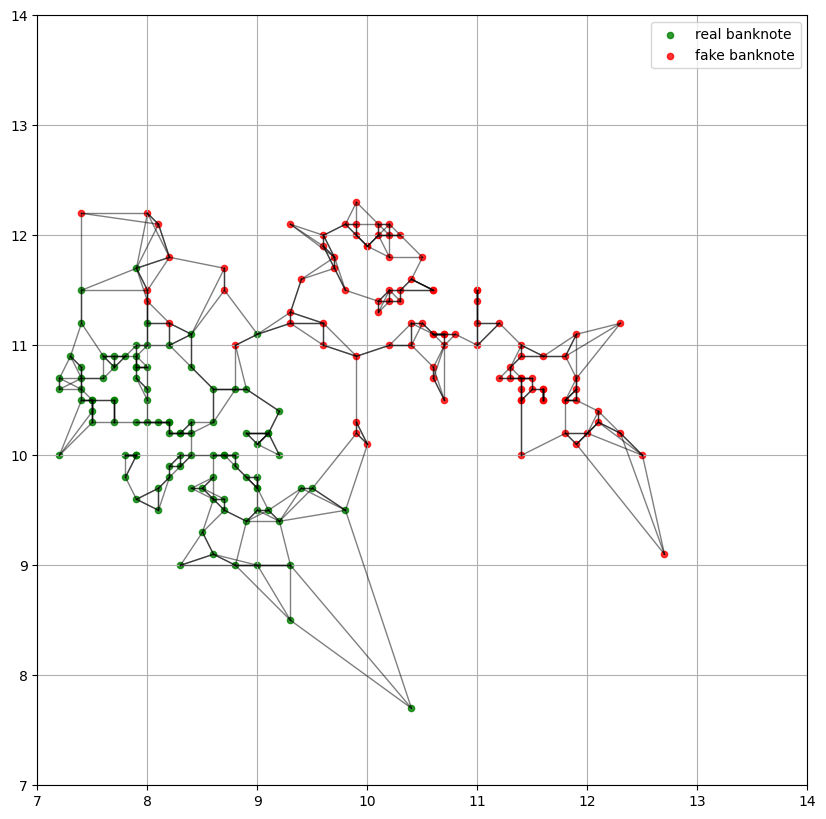

In [46]:
# Draw lines from each point to its three nearest neighbors (set K=3)
# Use some zip magic to make it happen (Hint is at below cell)
# You might need loops to generate the plot below
# set parameter [color='black', linewidth=1, alpha=0.5] when you draw lines 
dist_sq = np.sum((points[:, np.newaxis] - points[np.newaxis, :]) ** 2, axis=-1)


K = 3
nearest_neighbors = nearest_partition(dist_sq, K)

# Draw lines to the K nearest neighbors
plt.figure(figsize=(10, 10))
plt.scatter(X[index_0], Y[index_0], color='green', label='real banknote', s=20, alpha=0.8)
plt.scatter(X[index_1], Y[index_1], color='red', label='fake banknote', s=20, alpha=0.8)

# Loop through each point to draw lines to its K nearest neighbors
for i, neighbors in enumerate(nearest_neighbors):
    for neighbor in neighbors:
        plt.plot([X[i], X[neighbor]], [Y[i], Y[neighbor]], color='black', linewidth=1, alpha=0.5)


plt.xlim(7, 14)
plt.ylim(7, 14)

plt.grid(True)
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

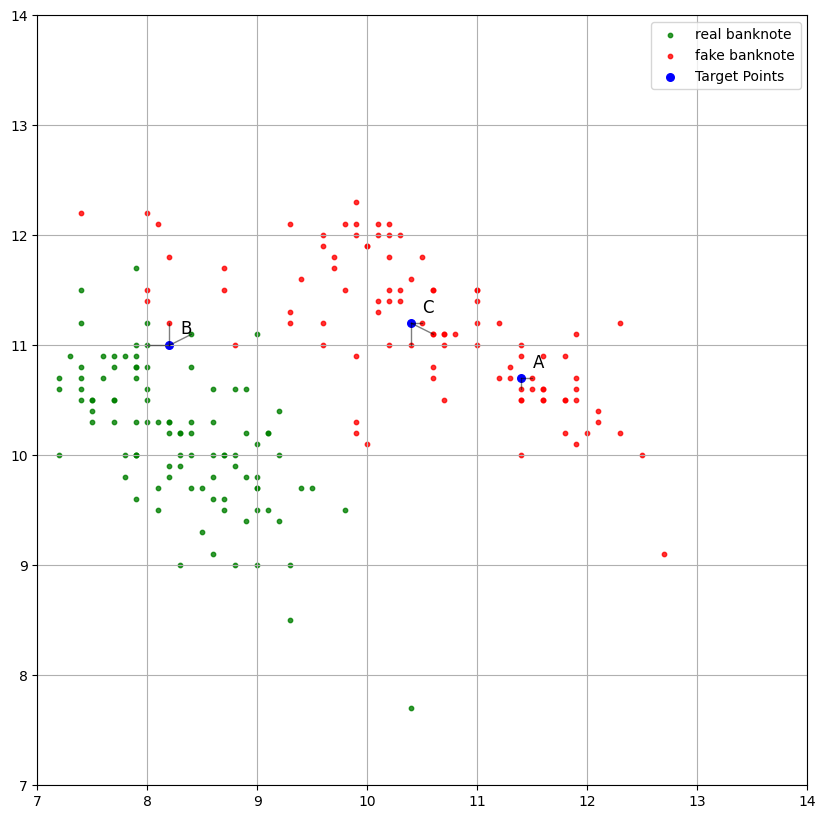

In [128]:
df = bank.copy()
X = df['Bottom'].to_numpy()
Y = df['Top'].to_numpy()
data_xy = np.column_stack((bottom, top))



# Set seed = 10 | Random select three dots from data_xy
# Save dots index in varible "target" 
# Don't need to change below three lines
random.seed(10)
target = np.array([random.randint(0, len(data_xy)) for i in range(3)])
text = ['A', 'B', 'C']

# Use [Numpy function] to find where label = 0 / label = 1
index_0 = np.where(df['conterfeit'] == 0)[0] 
index_1 = np.where(df['conterfeit'] == 1)[0]


# plot figure
plt.figure(figsize=(10, 10))
plt.scatter(X[index_0], Y[index_0], color='green', label='real banknote', s=10, alpha=0.8)
plt.scatter(X[index_1], Y[index_1], color='red', label='fake banknote', s=10, alpha=0.8)
plt.scatter(X[target], Y[target], color='blue', s=30, label='Target Points')
plt.xlim(7, 14)  
plt.ylim(7, 14)  

# grid configuration
plt.grid(True)
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')

K = 3 
nearest_indices = []  

dist_sq = np.sum((data_xy[:, np.newaxis] - data_xy[np.newaxis, :]) ** 2, axis=-1)

# Find nearest neighbors for each target point
for t in target:
    # Get indices of the K nearest neighbors (excluding the target point itself)
    neighbors = np.argsort(dist_sq[t])[1:K + 1]  # Sort distances and exclude the target point
    nearest_indices.append(neighbors)

# Convert to numpy array for easier indexing
nearest_indices = np.array(nearest_indices)

# Plot lines to nearest neighbors
for i, target_index in enumerate(target):
    for neighbor_index in nearest_indices[i]:
        plt.plot([X[target_index], X[neighbor_index]], [Y[target_index], Y[neighbor_index]], color='black', linewidth=1, alpha=0.5)  # Line to neighbor
    plt.text(X[target_index] + 0.1, Y[target_index] + 0.1, text[i], fontsize=12, color='black')
    
plt.show() 

### Question：由上圖進行判斷，回答 ABC 三點各自被 KNN 分為哪一群，並說明原因。

### My Answer：
A point with KNN(k=3) we look for the majority class of its neighbors to conclude the point is in which class.

A is fake because its neighbor are fake, fake, and fake. (majority class=fake)
<br><br>
B is real because its neighbor are fake, real, and real. (majority class=real)
<br><br>
C is fake beacuse its neighbor are fake, fake, and fake, (majority class=fake)

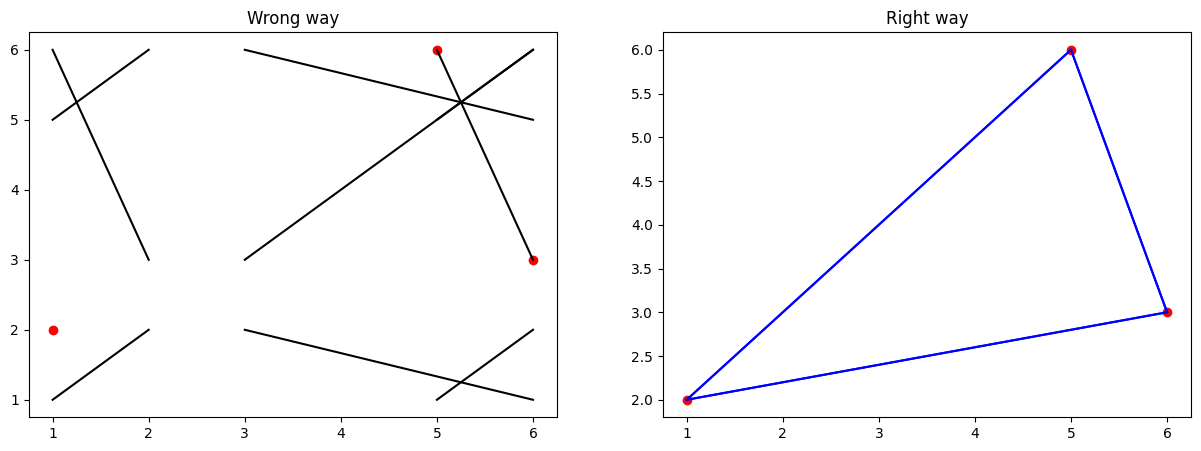

In [48]:
# Hint: How to drow a line between two dots

dots = np.array([[1, 2], [6, 3], [5, 6]])

plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.title('Wrong way')        
for i in range(len(dots)):
    plt.scatter(dots[i][0], dots[i][1], color='red')

for i in range(len(dots)):
    for j in range(len(dots)):
        plt.plot(dots[i], dots[j], color = 'black')

plt.subplot(122)
plt.title('Right way')

for i in range(len(dots)):
    plt.scatter(dots[i][0], dots[i][1], color='red')

for i in range(len(dots)):
    for j in range(len(dots)):
        plt.plot(*zip(dots[i], dots[j]), color = 'blue')